In [1]:
import tvb.simulator.models
import tvb.simulator.integrators

import matplotlib.pyplot as plt
import numpy as np
import math
import pickle

%load_ext autoreload
%autoreload 2

In [2]:
simulator_setup = {
    "model": "Generic2dOscillator",
    "integrator": "HeunStochastic",
}

In [3]:
# Parameters
simulator_params = {
    "a_sim": 2.0,
    "b_sim": -10.0,
    "c_sim": 0.0,
    "d_sim": 0.02,
    "I_sim": 0.0,
    "nsig": 0.003,
    "dt": 1.0,
    "simulation_length": 500
}

In [4]:
# TVB model and integrator setup
oscillator_model = getattr(tvb.simulator.models, simulator_setup["model"])(
    a=np.asarray([simulator_params["a_sim"]]),
    b=np.asarray([simulator_params["b_sim"]]),
    c=np.asarray([simulator_params["c_sim"]]),
    d=np.asarray([simulator_params["d_sim"]]),
    I=np.asarray([simulator_params["I_sim"]]),
)
oscillator_model.configure()

integrator = getattr(tvb.simulator.integrators, simulator_setup["integrator"])(dt=simulator_params["dt"])
integrator.noise.nsig = np.array([simulator_params["nsig"]])
integrator.noise.configure()
integrator.noise.configure_white(dt=integrator.dt)
integrator.set_random_state(random_state=None)
integrator.configure()
integrator.configure_boundaries(oscillator_model)

In [5]:
simulation_length = simulator_params["simulation_length"]
stimulus = 0.0
local_coupling = 0.0

current_state_v = np.random.uniform(low=-2.0, high=4.0, size=[1, 1, 1])
current_state_w = np.random.uniform(low=-6.0, high=6.0, size=[1, 1, 1])
current_state = np.vstack([current_state_v, current_state_w])
state = current_state

current_step = 0
number_of_nodes = 1
start_step = current_step + 1
node_coupling = np.zeros([2, 1, 1])
n_steps = int(math.ceil(simulation_length / integrator.dt))

X = [current_state.copy()]
for step in range(start_step, start_step + n_steps):
    state = integrator.integrate(state, oscillator_model, node_coupling, local_coupling, stimulus)
    X.append(state.copy())

X = np.asarray(X)

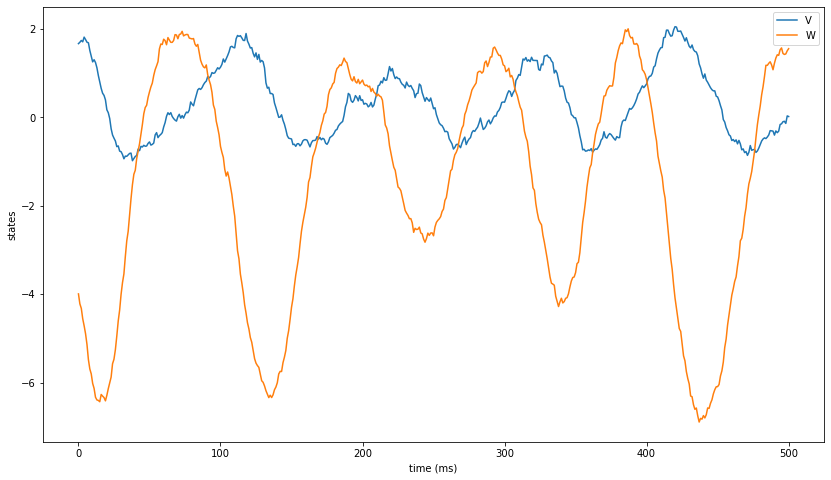

In [7]:
f1 = plt.figure(figsize=(14,8))
plt.plot(X[:, 0, 0, 0], label="V")
plt.plot(X[:, 1, 0, 0], label="W")
plt.xlabel("time (ms)")
plt.ylabel("states")
plt.legend()
plt.show()

In [8]:
X.shape

(501, 2, 1, 1)

In [9]:
with open("limit-cycle_simulation.pkl", "wb") as f:
    pickle.dump({**simulator_setup, **simulator_params, "simulation": X}, f)

In [ ]:
#np.save(f"limit-cycle_simulation", X)